# Marketing campaign

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing:
1. **People:** Birth year, education, income, etc.
2. **Price:** The expenditures on items like wine, fruits, and gold.
3. **Place:**  Information relevant to sales channels, such as websites and stores.
4. **Promotion:** Fields discussing promotions and the outcomes of various campaigns

As a data scientist, exploratory data analysis and hypothesis testing was conducted to enhance your comprehension of the diverse factors influencing customer acquisition.

## Data collection
Import the data from excel sheet

In [1]:
import numpy as np
import pandas as pd

marketing_data = pd.read_csv("datasets/marketing_data.csv")

In [3]:
# Display marketing data
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [5]:
# Check data type of each column
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Data wrangling
### Examine variables such as *Dt_Customer* and *Income* to verify their accurate importation

In [8]:
# Remove black spaces in column titles
marketing_data.columns = marketing_data.columns.str.strip()
# Convert the Dt_Customer in datetime format 
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], format="%m/%d/%y")
# Convert the income as numeric data type
marketing_data['Income'] = pd.to_numeric(marketing_data['Income'].replace('[$,]', '', regex=True))

In [10]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Handle missing data. 
Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to
cleanse the data before proceeding. 
Specifically, scrutinize the categories of education and marital status for data cleaning.

In [13]:
# Check missing values
print(marketing_data.isnull().sum())

# Preview the categories
print(marketing_data['Education'].unique())
print(marketing_data['Marital_Status'].unique())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [15]:
# Treat illigical/similar data. Example marital status as YOLO, Absurd, Alone belong to single. Together is same as married
marketing_data['Marital_Status'] = marketing_data['Marital_Status'].replace({
    'YOLO': 'Single',  # Or 'Unknown', or drop the row if needed
    'Absurd': 'Single',
    'Alone': 'Single',
    'Together' : 'Married'
})

In [17]:
# Compute gropuwise mean
grouped_means = marketing_data.groupby(['Education', 'Marital_Status'])['Income'].mean()
print(grouped_means)

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           45597.992647
            Single            53673.944444
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21663.852941
            Single            18238.666667
            Widow             22123.000000
Graduation  Divorced          54526.042017
            Married           52779.380952
            Single            51365.633065
            Widow             54976.657143
Master      Divorced          50331.945946
            Married           52785.795833
            Single            53787.142857
            Widow             58401.545455
PhD         Divorced          53096.615385
            Married           57343.238562
            Single            53039.666667
            Widow             60288.083333
Name: Income, dtype: float64


In [19]:
# Replace the null values of income with grouped average
def replace_income(row):
    if pd.isnull(row['Income']):
        return grouped_means.get((row['Education'], row['Marital_Status']), marketing_data['Income'].mean())
    else:
        return row['Income']

marketing_data['Income'] = marketing_data.apply(replace_income, axis=1)

# Recheck for null values
print('Missing values in income filled with average values' if not marketing_data['Income'].isnull().sum() else print('Still there are missing values!'))

Missing values in income filled with average values


### Create variables to represent the total number of children, age, and total spending. 
Derive the total purchases from the number of transactions across the three 
channels

In [22]:
from datetime import datetime

marketing_data['Total_kids'] = marketing_data['Kidhome'] + marketing_data['Teenhome']
current_year = datetime.now().year
marketing_data['Age'] = current_year - marketing_data['Year_Birth']

# List of monetary columns
spending_columns = [col for col in marketing_data.columns if col.startswith('Mnt')]

# Compute total spending
marketing_data['Total_Spending'] = marketing_data[spending_columns].sum(axis=1)
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_kids,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,55,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,64,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,67,251
3,1386,1967,Graduation,Married,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,58,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,36,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,1,49,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,1,48,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,1,49,309
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,0,47,1383


## Exploratory Data Analysis
### Data visualisation
Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

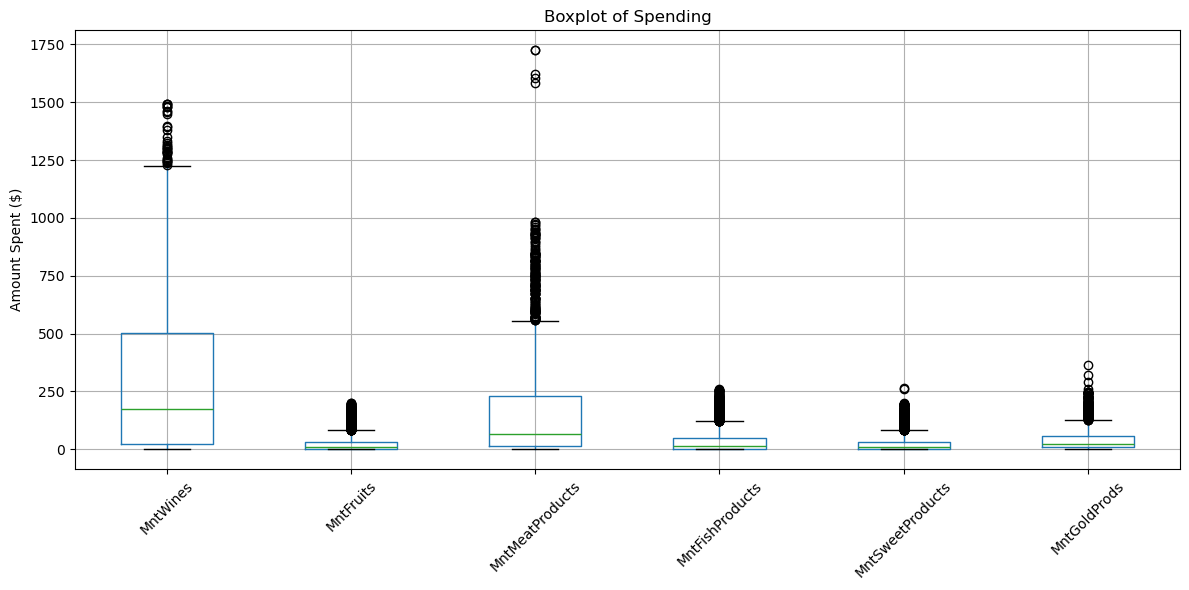

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
marketing_data[spending_columns].boxplot(rot=45)
plt.title('Boxplot of Spending')
plt.ylabel('Amount Spent ($)')
plt.tight_layout()
plt.show()

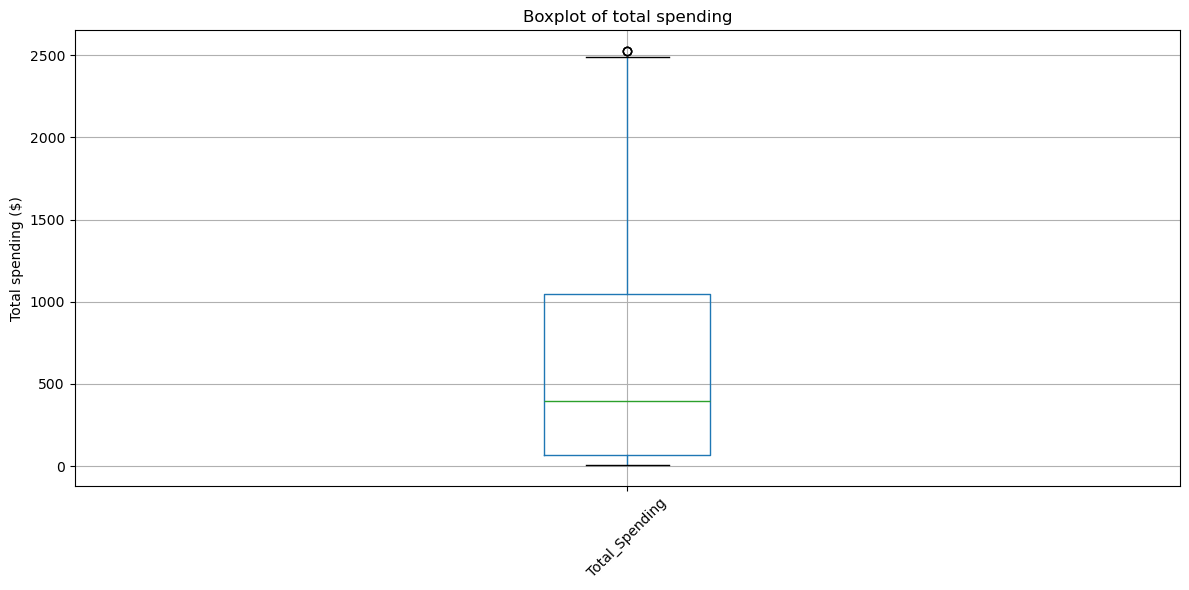

In [26]:
plt.figure(figsize=(12, 6))
pd.DataFrame(marketing_data['Total_Spending']).boxplot(rot=45)
plt.title('Boxplot of total spending')
plt.ylabel('Total spending ($)')
plt.tight_layout()
plt.show()

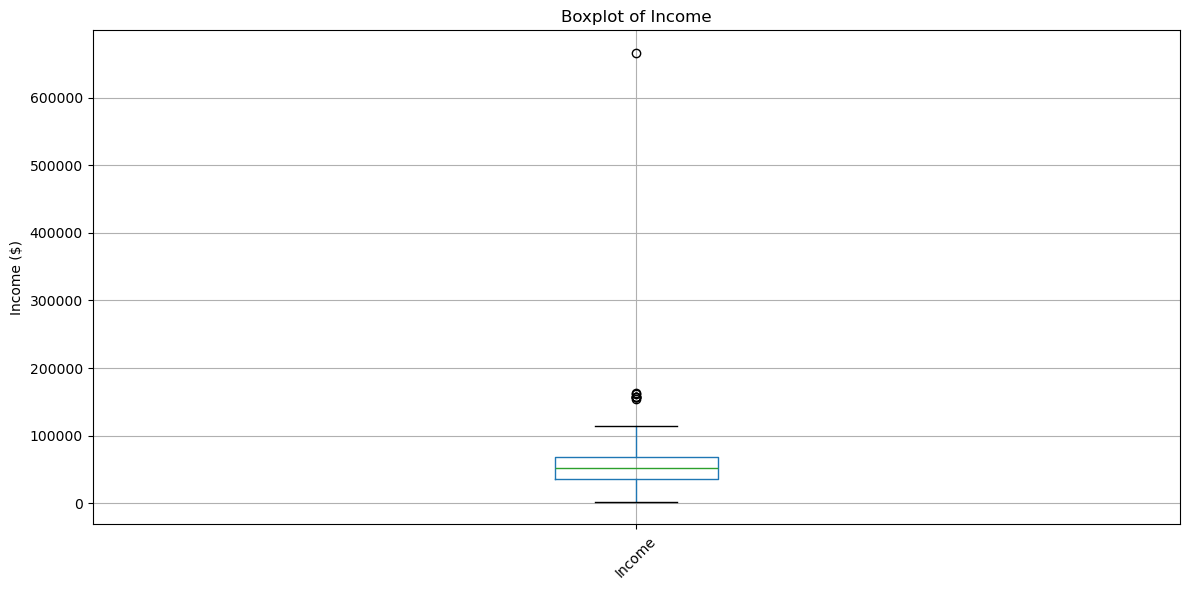

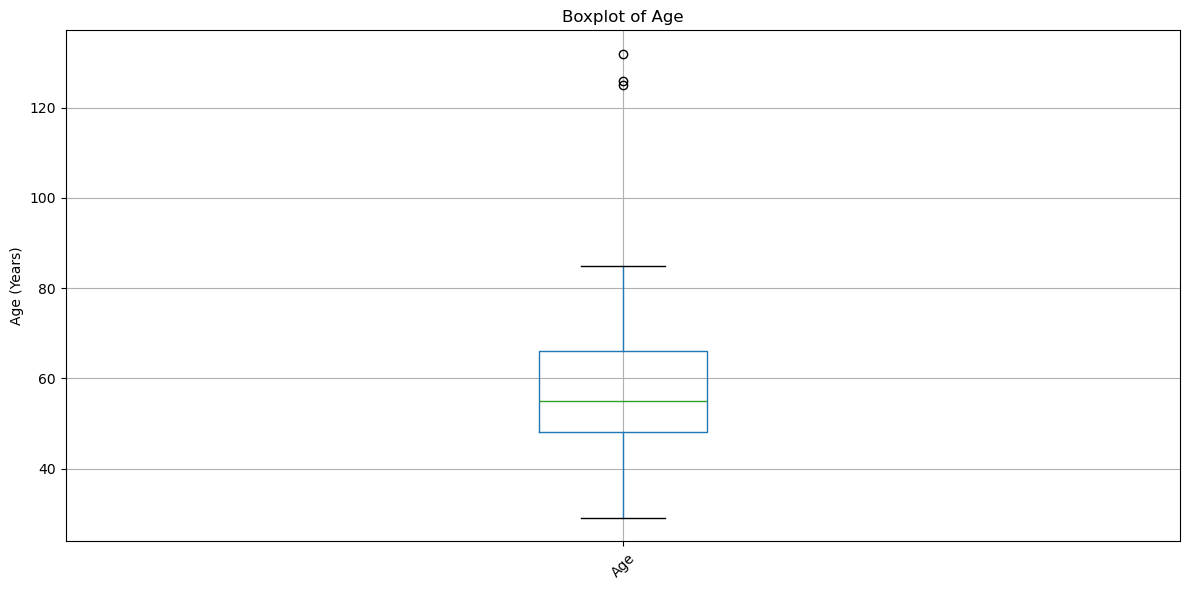

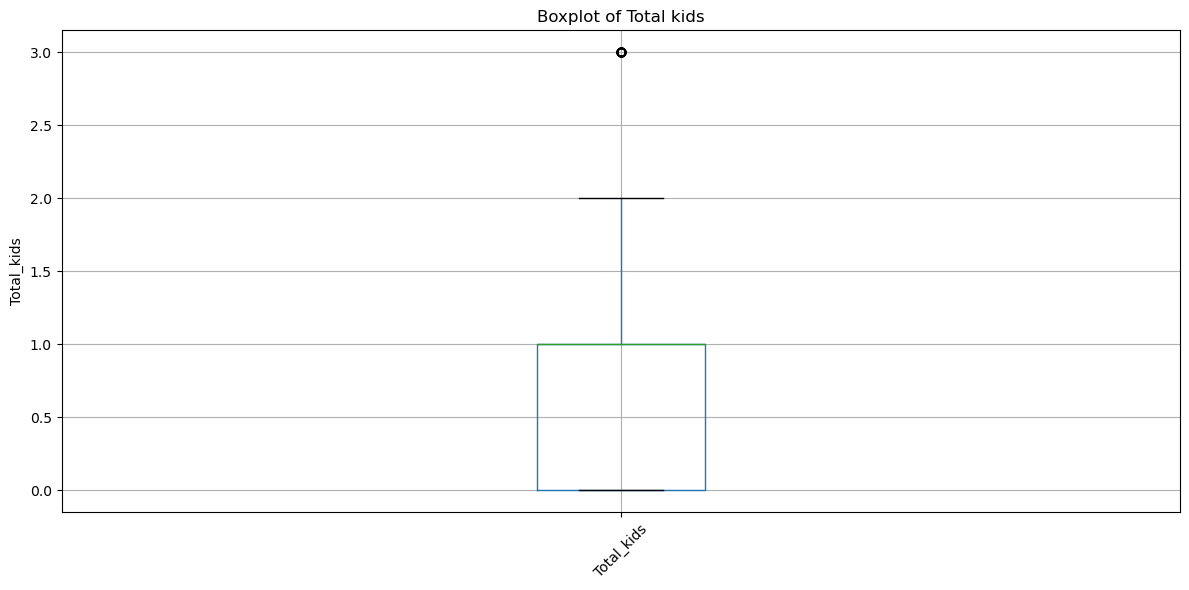

In [29]:
plt.figure(figsize=(12, 6))
pd.DataFrame(marketing_data['Income']).boxplot(rot=45)
plt.title('Boxplot of Income')
plt.ylabel('Income ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
pd.DataFrame(marketing_data['Age']).boxplot(rot=45)
plt.title('Boxplot of Age')
plt.ylabel('Age (Years)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
pd.DataFrame(marketing_data['Total_kids']).boxplot(rot=45)
plt.title('Boxplot of Total kids')
plt.ylabel('Total_kids')
plt.tight_layout()
plt.show()

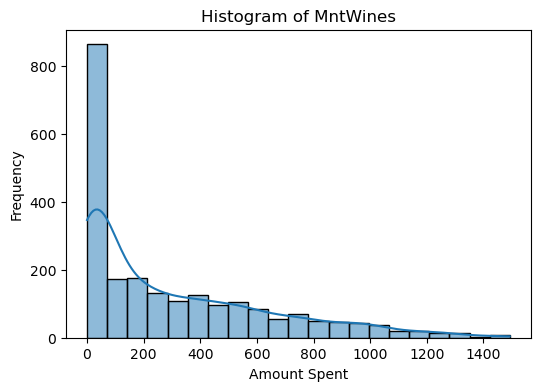

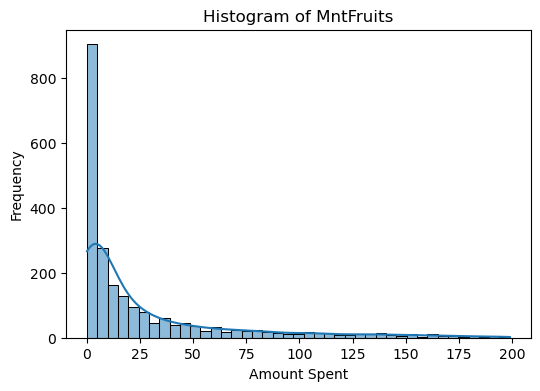

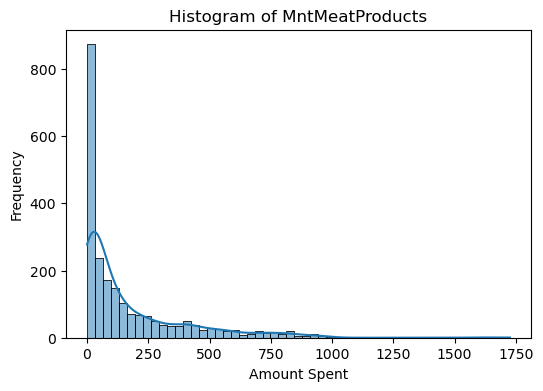

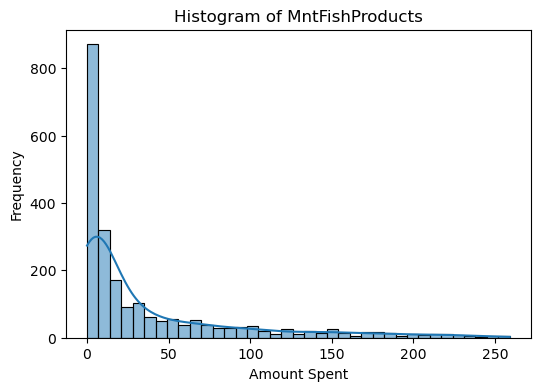

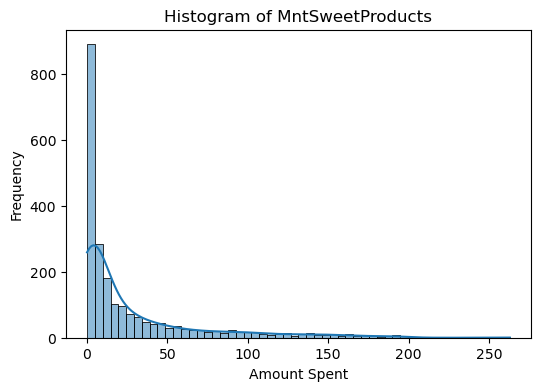

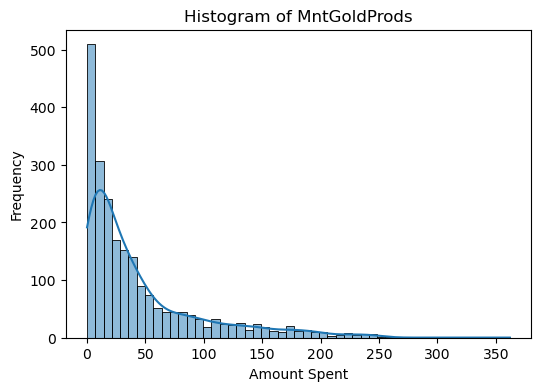

In [31]:
for col in spending_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(marketing_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')
    plt.show()

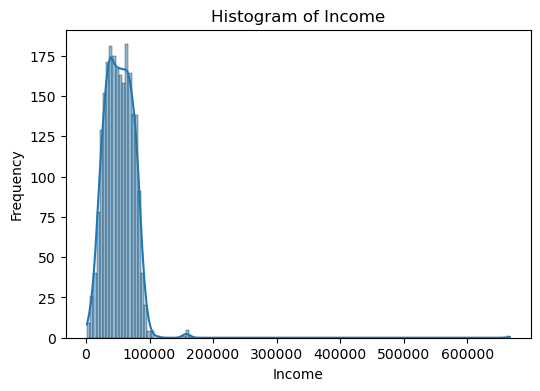

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(marketing_data['Income'], kde=True)
plt.title(f'Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

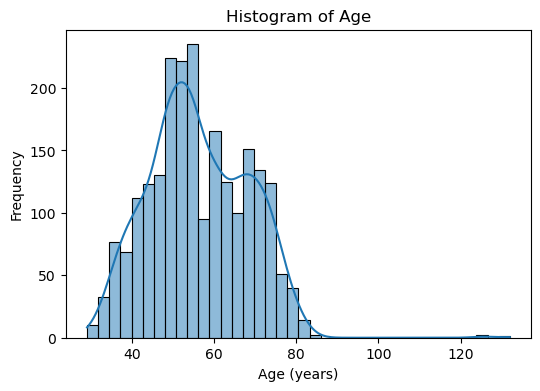

In [35]:
plt.figure(figsize=(6, 4))
sns.histplot(marketing_data['Age'], kde=True)
plt.title(f'Histogram of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

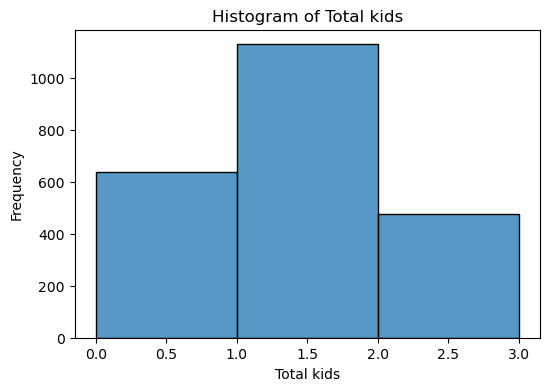

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(marketing_data['Total_kids'], binwidth=1, kde=False)
plt.title(f'Histogram of Total kids')
plt.xlabel('Total kids')
plt.ylabel('Frequency')
plt.show()

### Treat Outliers

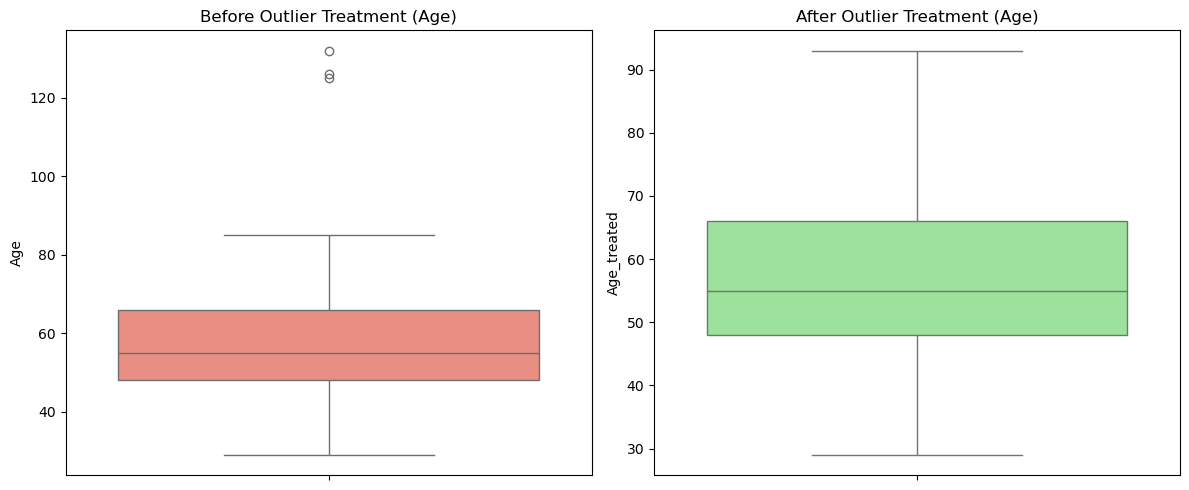

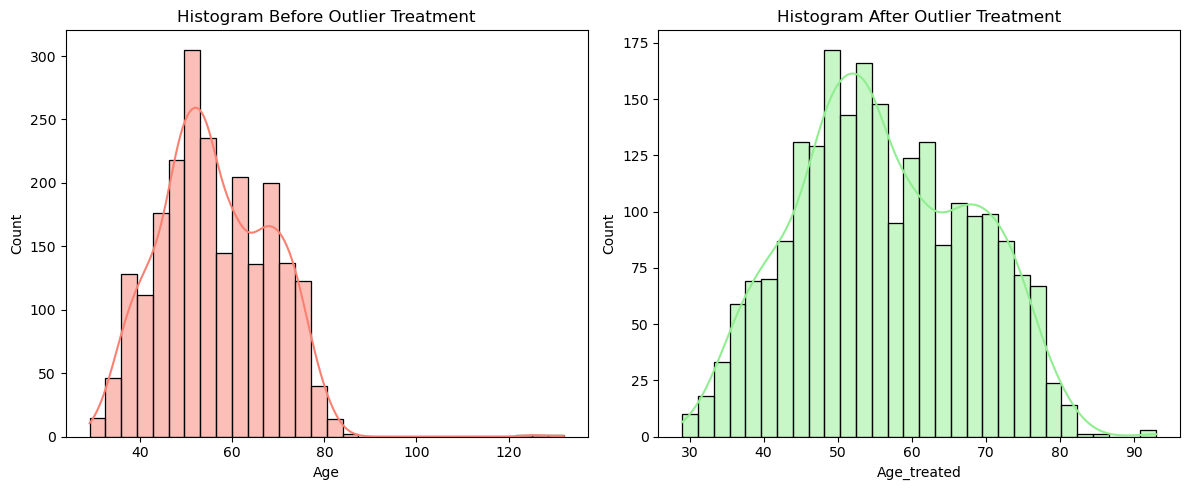

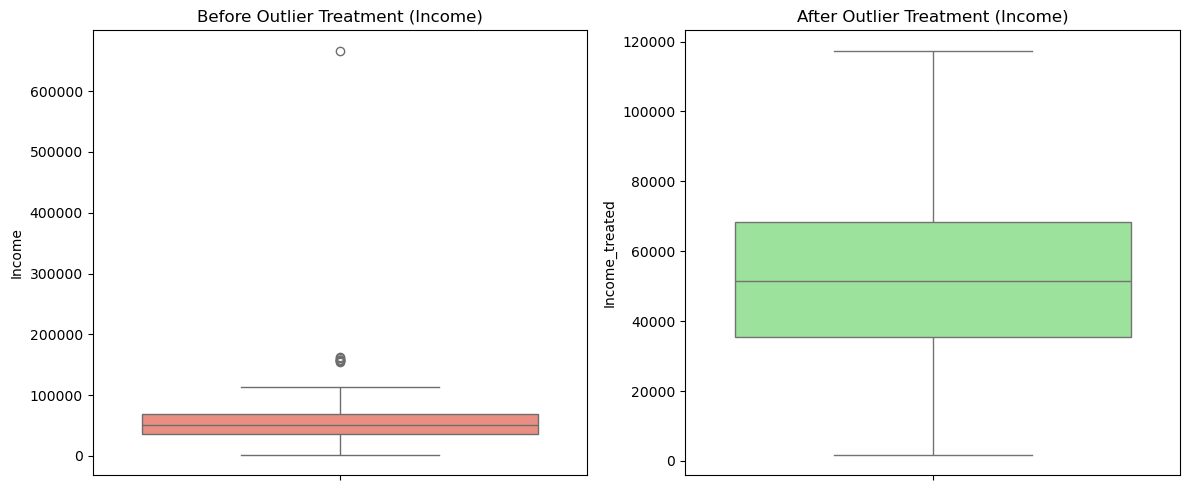

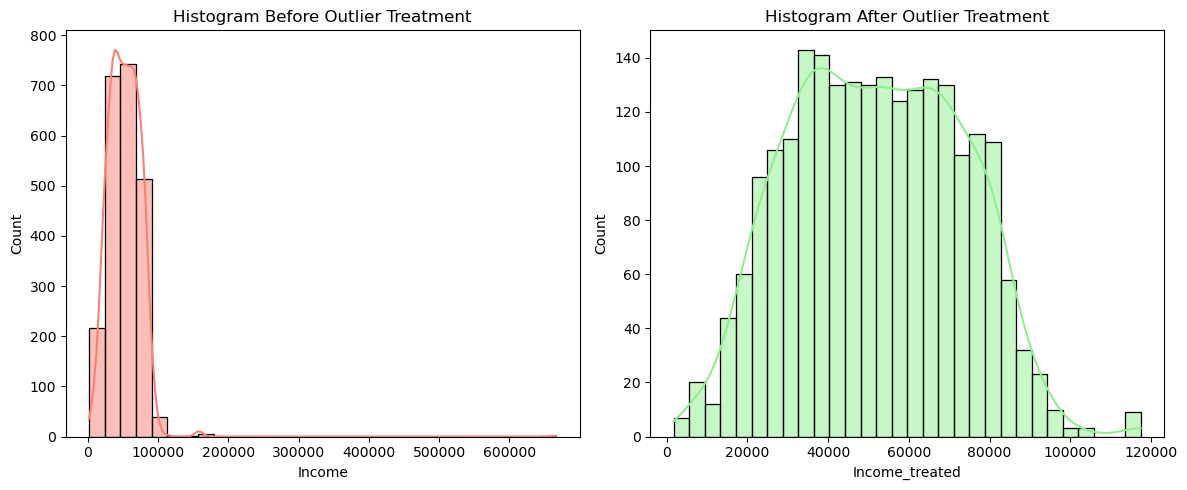

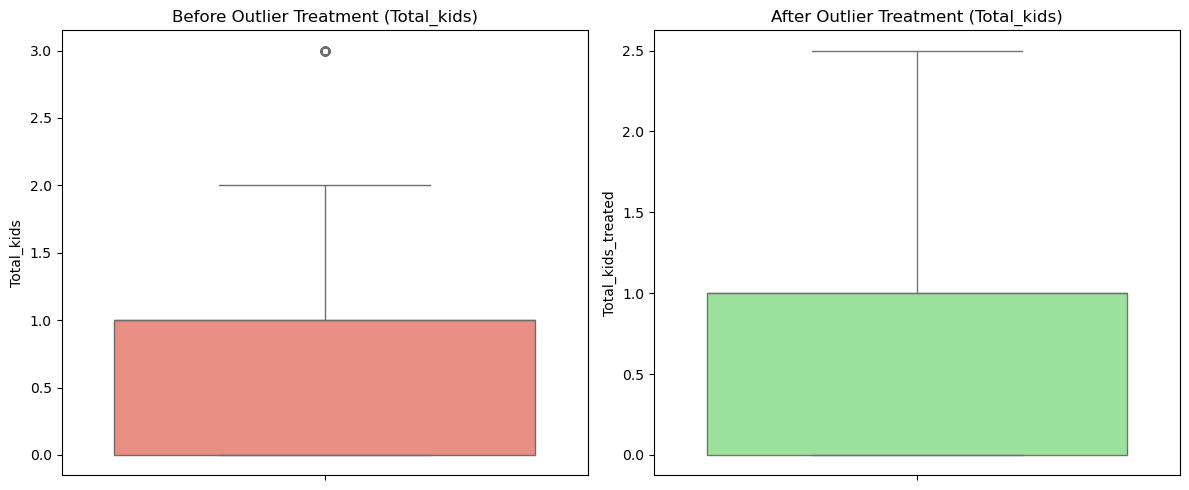

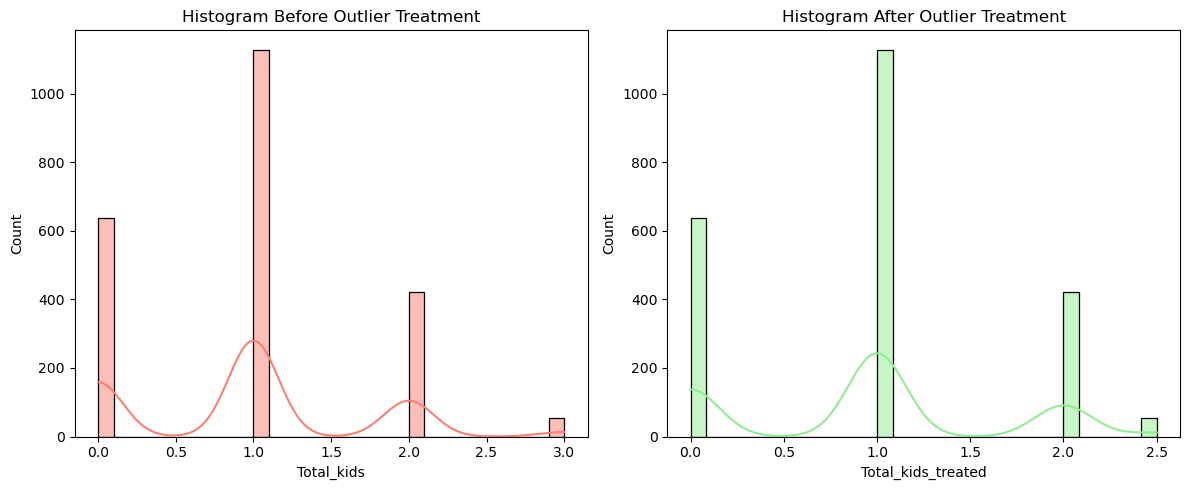

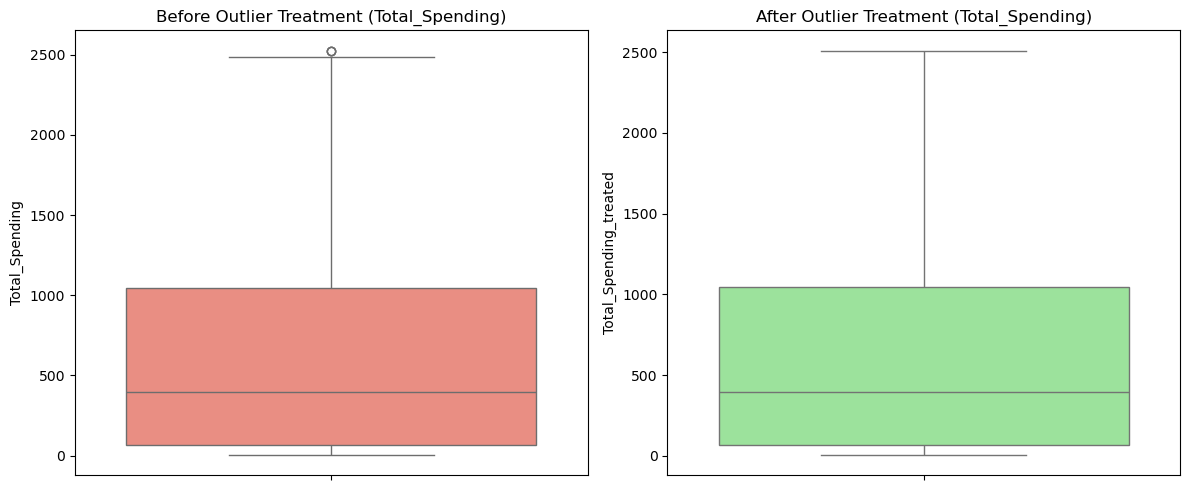

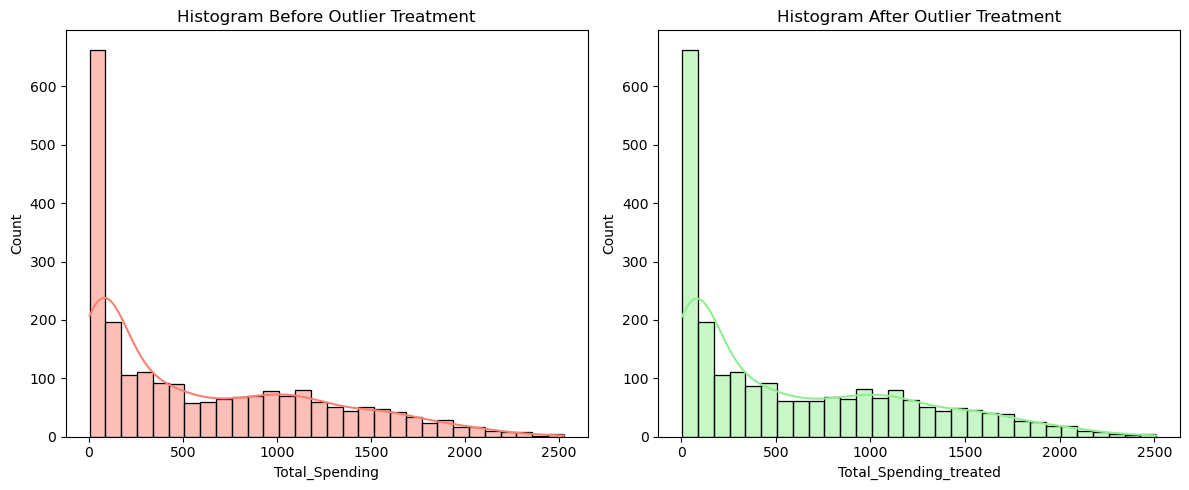

In [40]:
# Treat outliers (Interquartile range method)
columns = ['Age','Income','Total_kids','Total_Spending']
for col in columns:
    Q1 = marketing_data[f'{col}'].quantile(0.25)
    Q3 = marketing_data[f'{col}'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    marketing_data_untreated = marketing_data.copy()
    
    marketing_data[f'{col}_treated'] = marketing_data[f'{col}'].clip(lower, upper)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=marketing_data_untreated[f'{col}'], color='salmon')
    plt.title(f'Before Outlier Treatment ({col})')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=marketing_data[f'{col}_treated'], color='lightgreen')
    plt.title(f'After Outlier Treatment ({col})')
    
    plt.tight_layout()
    plt.show()
    
    # Histogram
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(marketing_data_untreated[f'{col}'], bins=30, kde=True, color='salmon')
    plt.title('Histogram Before Outlier Treatment')
    
    plt.subplot(1, 2, 2)
    sns.histplot(marketing_data[f'{col}_treated'], bins=30, kde=True, color='lightgreen')
    plt.title('Histogram After Outlier Treatment')
    
    plt.tight_layout()
    plt.show()

### Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [43]:
cat_qualification = (marketing_data['Education'].unique())
education_order = {
    'Basic': 0,
    'Graduation': 1,
    '2n Cycle': 2,
    'Master': 3,
    'PhD': 4
}

marketing_data['Education_Encoded'] = marketing_data['Education'].map(education_order)


In [45]:
marketing_data['Education_Encoded']

0       1
1       1
2       1
3       1
4       1
       ..
2235    4
2236    2
2237    1
2238    1
2239    4
Name: Education_Encoded, Length: 2240, dtype: int64

In [47]:
cat_marital_status = (marketing_data['Marital_Status'].unique())
marital_status_order = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Separated': 3,
}

marketing_data['Marital_Status_Encoded'] = marketing_data['Marital_Status'].map(marital_status_order)

In [49]:
marketing_data['Marital_Status']

0       Divorced
1         Single
2        Married
3        Married
4         Single
          ...   
2235    Divorced
2236     Married
2237    Divorced
2238     Married
2239     Married
Name: Marital_Status, Length: 2240, dtype: object

In [51]:
cat_marital_status

array(['Divorced', 'Single', 'Married', 'Widow'], dtype=object)

In [53]:
# One hot encoding
marketing_data = pd.get_dummies(marketing_data, columns=['Education', 'Marital_Status'], drop_first=True)
marketing_data

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Spending_treated,Education_Encoded,Marital_Status_Encoded,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,1190.0,1,2.0,False,True,False,False,False,False,False
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,577.0,1,0.0,False,True,False,False,False,True,False
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,251.0,1,1.0,False,True,False,False,True,False,False
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,...,11.0,1,1.0,False,True,False,False,True,False,False
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,...,91.0,1,0.0,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,...,689.0,4,2.0,False,False,False,True,False,False,False
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,...,55.0,2,1.0,False,False,False,False,True,False,False
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,...,309.0,1,2.0,False,True,False,False,False,False,False
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,...,1383.0,1,1.0,False,True,False,False,True,False,False


## Data Analysis
### Heatmap to illustrate the correlation between different pairs of variables.

In [56]:
# Filter only numeric columns
numeric_data_raw = (marketing_data_untreated.select_dtypes(include=['int64', 'float64']))
numeric_data_raw = numeric_data_raw.drop(columns=['ID','Year_Birth','Age_treated','Income_treated','Total_kids_treated'])
# Compute correlation matrix

corr_matrix_raw = numeric_data_raw.corr()


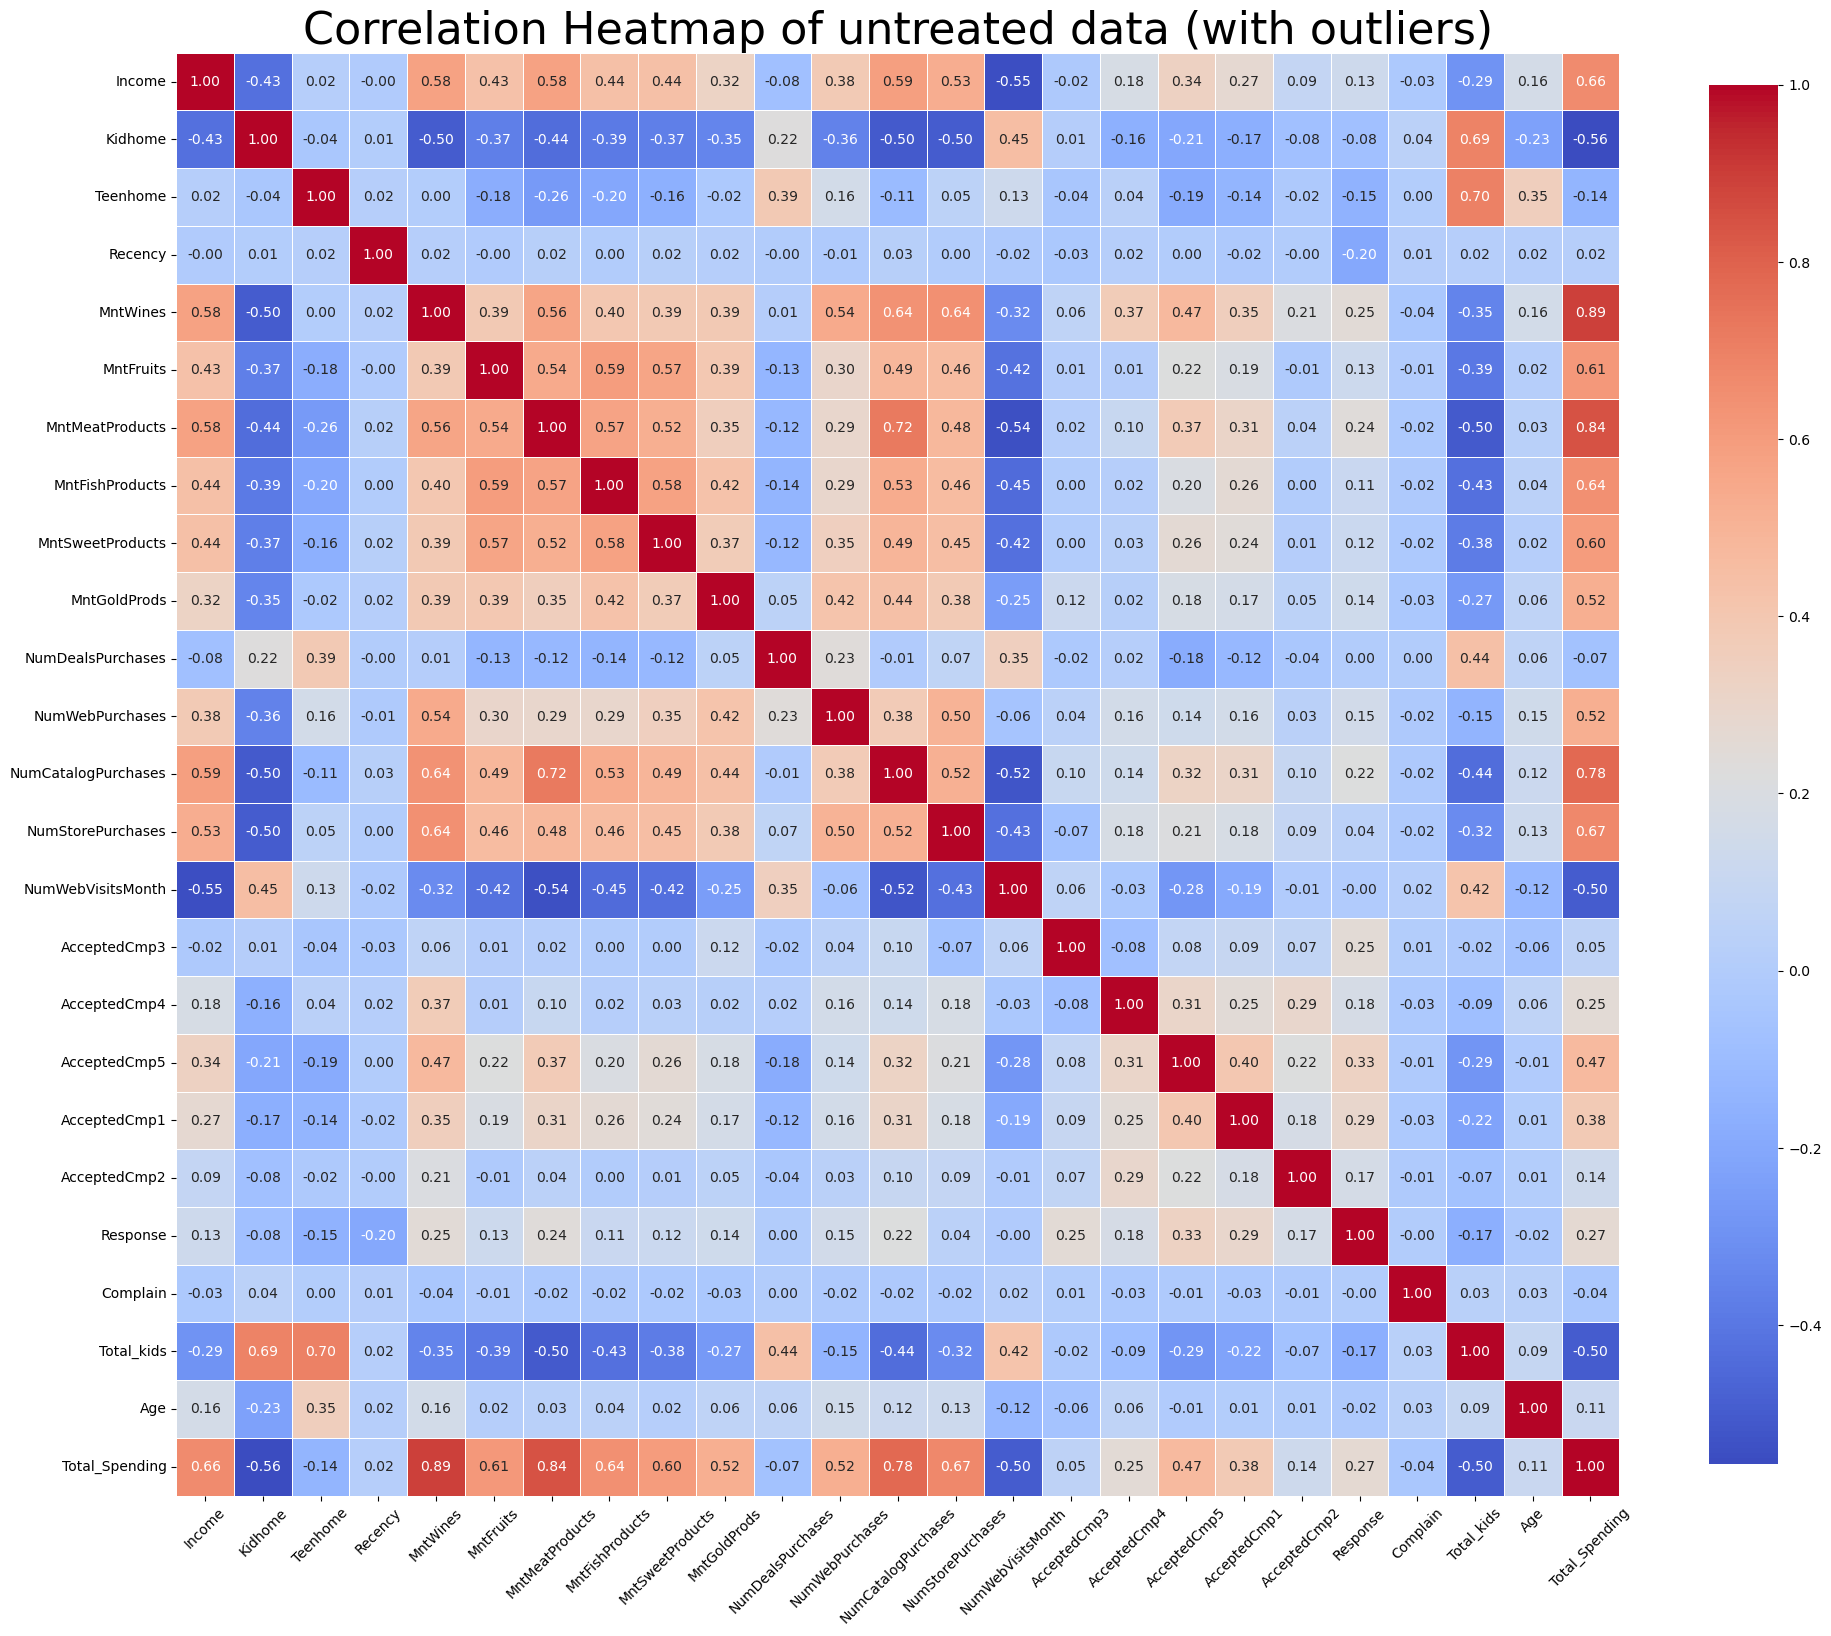

In [58]:
corr_matrix_raw
# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_raw, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.7})
plt.title('Correlation Heatmap of untreated data (with outliers)',fontsize = 32)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
numeric_data_outlier_treated = (marketing_data.select_dtypes(include=['int64', 'float64']))
numeric_data_outlier_treated = numeric_data_outlier_treated.drop(columns=['ID','Year_Birth','Age','Income','Total_kids'])
numeric_data_outlier_treated

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Response,Complain,Total_Spending,Age_treated,Income_treated,Total_kids_treated,Total_Spending_treated,Education_Encoded,Marital_Status_Encoded
0,0,0,0,189,104,379,111,189,218,1,...,0,1,0,1190,55,84835.0,0.0,1190.0,1,2.0
1,0,0,0,464,5,64,7,0,37,1,...,1,1,0,577,64,57091.0,0.0,577.0,1,0.0
2,0,1,0,134,11,59,15,2,30,1,...,0,0,0,251,67,67267.0,1.0,251.0,1,1.0
3,1,1,0,10,0,1,0,0,0,1,...,0,0,0,11,58,32474.0,2.0,11.0,1,1.0
4,1,0,0,6,16,24,11,0,34,2,...,0,1,0,91,36,21474.0,1.0,91.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,99,372,18,126,47,48,78,2,...,0,0,0,689,49,66476.0,1.0,689.0,4,2.0
2236,1,0,99,5,10,13,3,8,16,1,...,0,0,0,55,48,31056.0,1.0,55.0,2,1.0
2237,1,0,99,185,2,88,15,5,14,2,...,0,0,0,309,49,46310.0,1.0,309.0,1,2.0
2238,0,0,99,267,38,701,149,165,63,1,...,0,0,0,1383,47,65819.0,0.0,1383.0,1,1.0


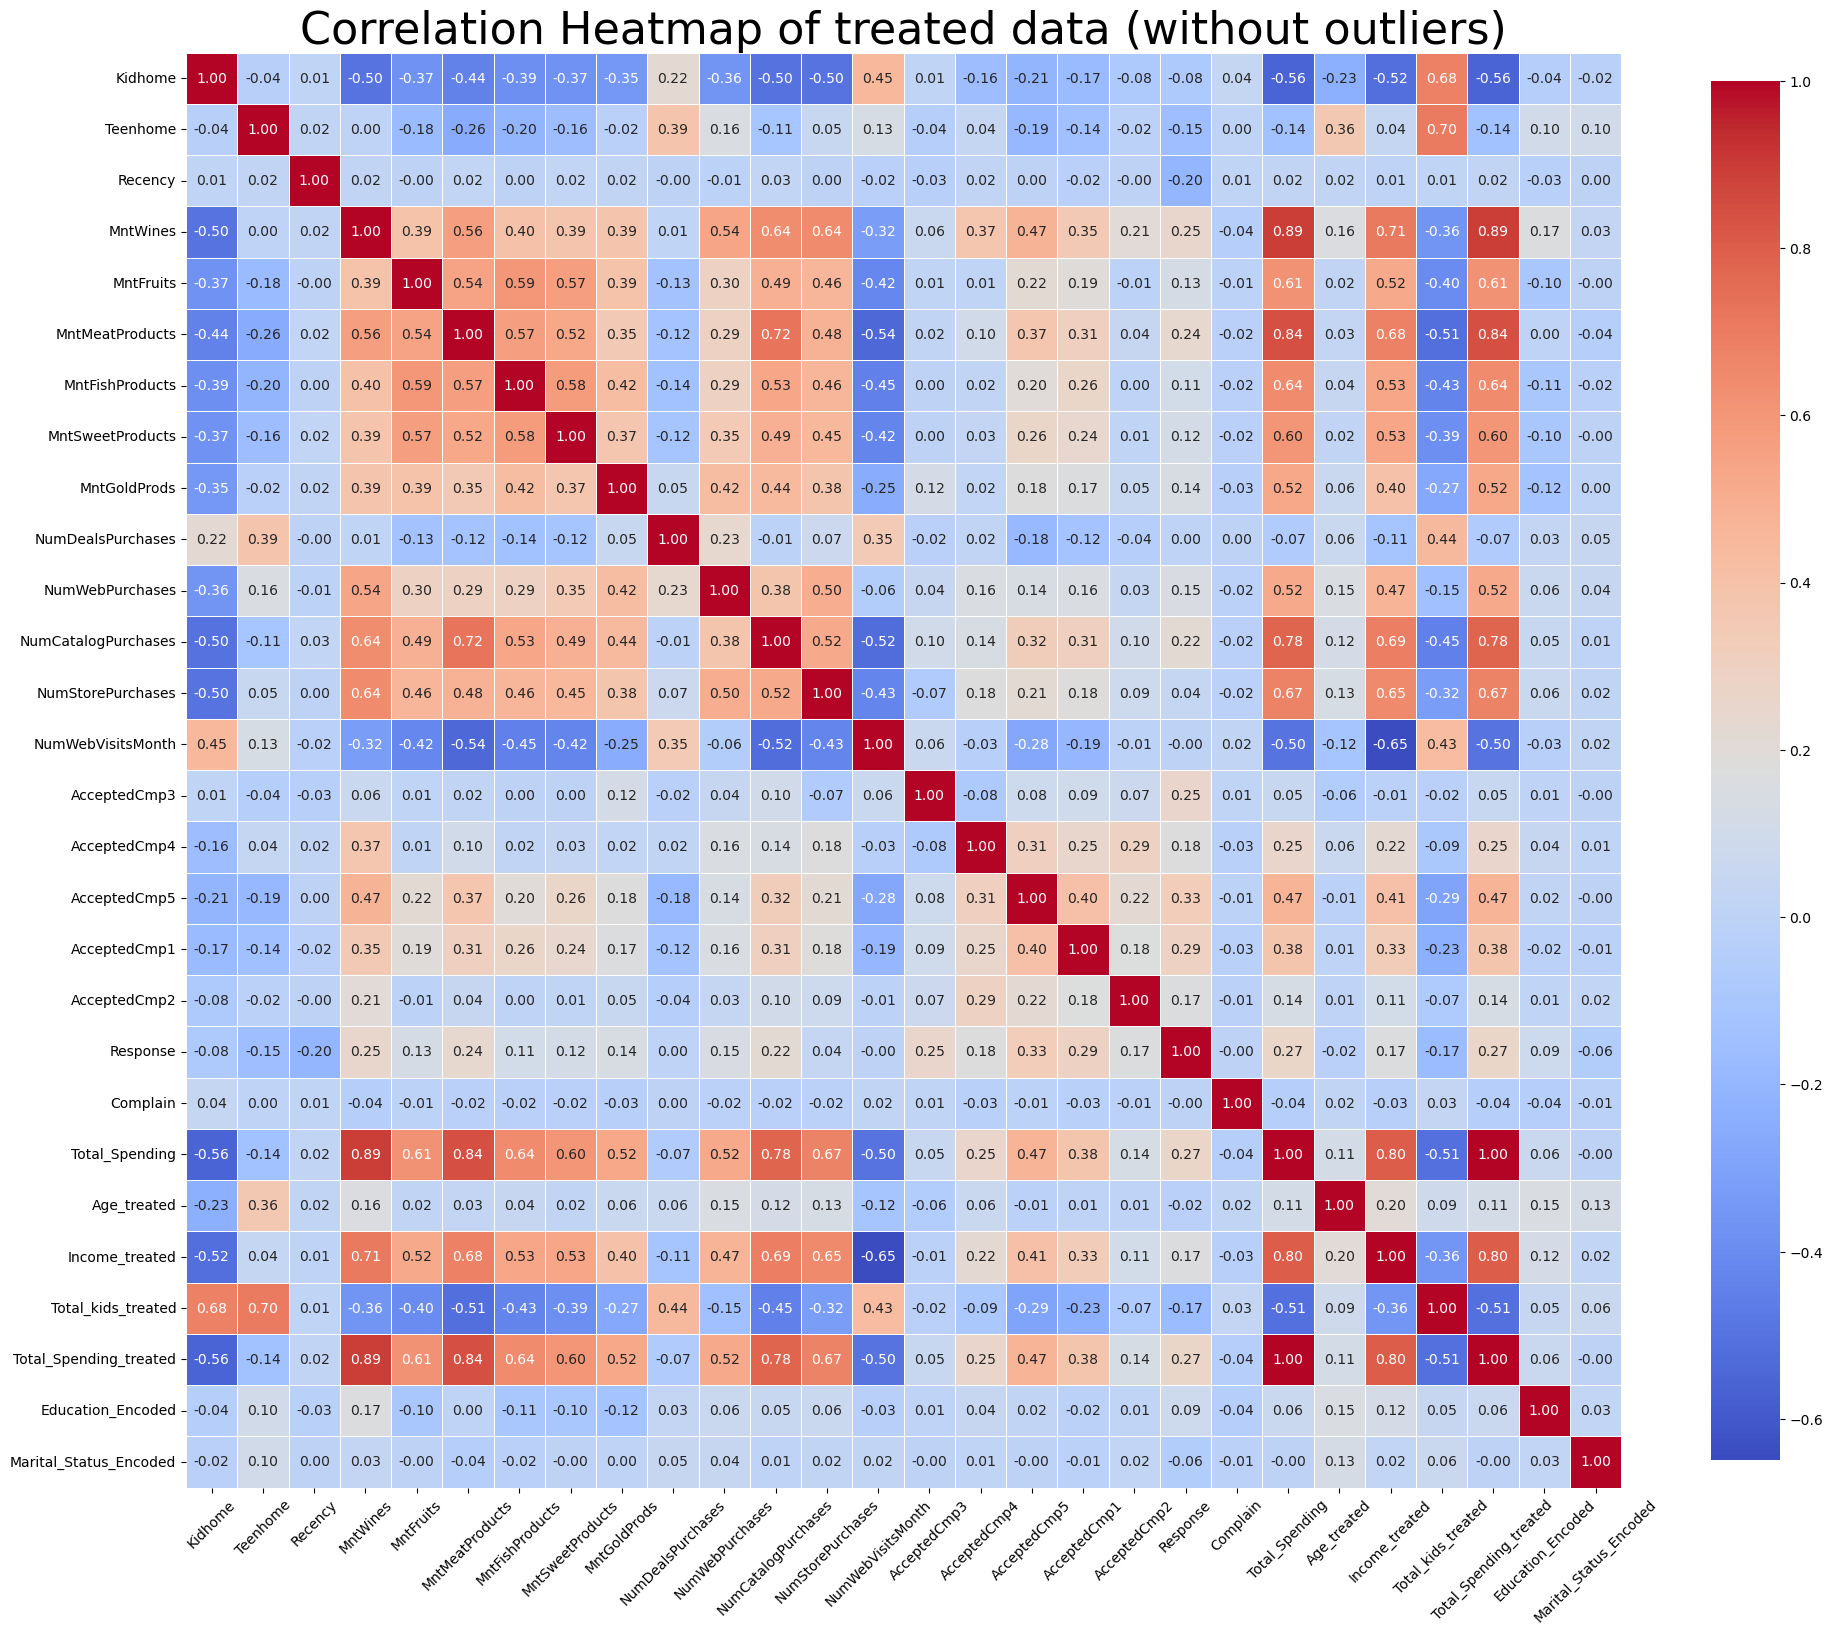

In [62]:
corr_matrix = numeric_data_outlier_treated.corr()
# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5,cbar_kws={'shrink': 0.7})
plt.title('Correlation Heatmap of treated data (without outliers)',fontsize = 32)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Hypothesis Testing
Test the following hypothesis:
1. Older individuals may not possess the same level of technological proficiency
and may, therefore, lean toward traditional in-store shopping preferences.
2. Customers with children likely experience time constraints, making online
shopping a more convenient option.
3. Sales at physical stores may face the risk of cannibalization by alternative
distribution channels.
4. Does the United States significantly outperform the rest of the world in total
purchase volumes?


#### 1. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
- **Null Hypothesis (H0):** Age has no impact on preference for in-store vs online shopping.
- **Alternative Hypothesis (H1):** Older individuals prefer in-store shopping significantly more than younger individuals.

T-statistic: 6.47, p-value: 0.0000
Older individuals do shop more in-store.


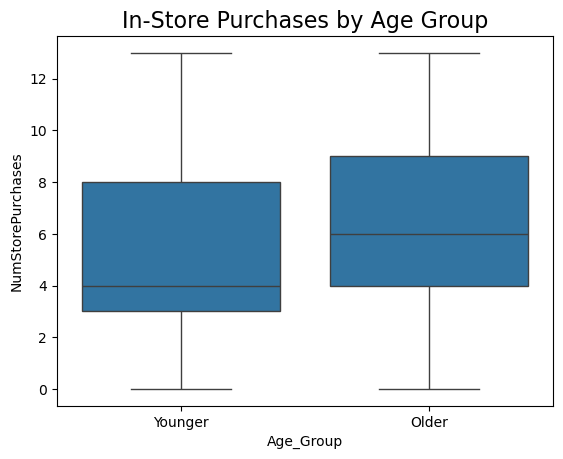

In [65]:
# Define age groups (older = 60+)
from scipy.stats import ttest_ind

marketing_data['Age_Group'] = marketing_data['Age'].apply(lambda x: 'Older' if x >= 60 else 'Younger')

older = marketing_data[marketing_data['Age_Group'] == 'Older']['NumStorePurchases']
younger = marketing_data[marketing_data['Age_Group'] == 'Younger']['NumStorePurchases']
# Perform two sample t-test for tesing the hypothesis
t_stat, p_value = ttest_ind(older, younger)

print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Older individuals do shop more in-store.")
else:
    print("No significant difference in in-store shopping preference.")

sns.boxplot(x='Age_Group', y='NumStorePurchases', data=marketing_data)
plt.title("In-Store Purchases by Age Group", fontsize=16)
plt.show()

#### 2. Customers with children likely experience time constraints, making online shopping a more convenient option.
- **Null Hypothesis (H0):** Number of kids has no impact on preference for in-store vs online shopping.
- **Alternative Hypothesis (H1):** Customers with children prefer online shopping significantly more than customers with no kid

T-statistic: -3.32, p-value: 0.0009
Customers with children likely experience time constraints, making online shopping a more convenient option.


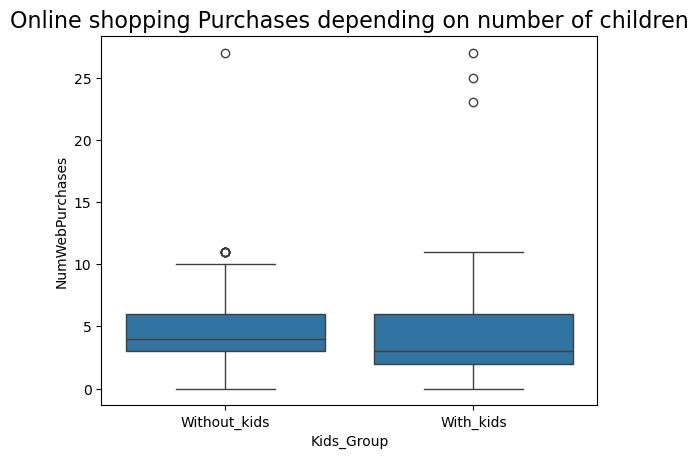

In [89]:
marketing_data['Kids_Group'] = marketing_data['Total_kids'].apply(lambda x: 'With_kids' if x >= 1 else 'Without_kids')

With_kids = marketing_data[marketing_data['Kids_Group'] == 'With_kids']['NumWebPurchases']
Without_kids = marketing_data[marketing_data['Kids_Group'] == 'Without_kids']['NumWebPurchases']

# Perform two sample t-test for tesing the hypothesis
t_stat, p_value = ttest_ind(With_kids, Without_kids)

print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Customers with children likely experience time constraints, making online shopping a more convenient option.")
else:
    print("Number of kids has no impact on preference for in-store vs online shopping.")

sns.boxplot(x='Kids_Group', y='NumWebPurchases', data=marketing_data)
plt.title("Online shopping Purchases depending on number of children", fontsize=16)
plt.show()

#### 3. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
- **Null Hypothesis (H0):** No difference in in-store purchases based on online activity and catalog
- **Alternative Hypothesis (H1):** Customers who purchase more online buy less in-store (suggesting cannibalization)

In [95]:
# Split into high and low web purchasers based on median
median_web = marketing_data['NumWebPurchases'].median()
marketing_data['Web_Group'] = marketing_data['NumWebPurchases'].apply(lambda x: 'High' if x > median_web else 'Low')

high_web = marketing_data[marketing_data['Web_Group'] == 'High']['NumStorePurchases']
low_web = marketing_data[marketing_data['Web_Group'] == 'Low']['NumStorePurchases']

# Perform two sample t-test for tesing the hypothesis
t_stat, p_value = ttest_ind(high_web, low_web)

print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference: Suggests web cannibalizes store purchases.")
else:
    print("No significant difference: No evidence of cannibalization.")

# Split into high and low catalog purchasers based on median
median_catalog = marketing_data['NumCatalogPurchases'].median()
marketing_data['Catalog_Group'] = marketing_data['NumCatalogPurchases'].apply(lambda x: 'High' if x > median_catalog else 'Low')

high_cat = marketing_data[marketing_data['Catalog_Group'] == 'High']['NumStorePurchases']
low_cat = marketing_data[marketing_data['Catalog_Group'] == 'Low']['NumStorePurchases']

t_stat_cat, p_value_cat = ttest_ind(high_cat, low_cat)

print(f"Catalog T-statistic: {t_stat_cat:.2f}, p-value: {p_value_cat:.4f}")

if p_value_cat < 0.05:
    print("Significant difference: Suggests catalog cannibalizes store purchases.")
else:
    print("No significant difference due to catalogue buyers: No evidence of cannibalization.")

T-statistic: 25.82, p-value: 0.0000
Significant difference: Suggests web cannibalizes store purchases.
Catalog T-statistic: 35.33, p-value: 0.0000
Significant difference: Suggests catalog cannibalizes store purchases.


#### 4. Does the United States significantly outperform the rest of the world in total purchase volumes?
- **Null Hypothesis (H0):** The mean total purchases by U.S. customers is equal to or less than that of other countries.
- **Alternative Hypothesis (H1):** The mean total purchases by U.S. customers is significantly greater than that of other countries.

T-statistic: 1.47
p-value: 0.1447
No significant evidence that US outperforms others.
US mean: 13.513761467889909
Other countries mean: 12.487095260441107


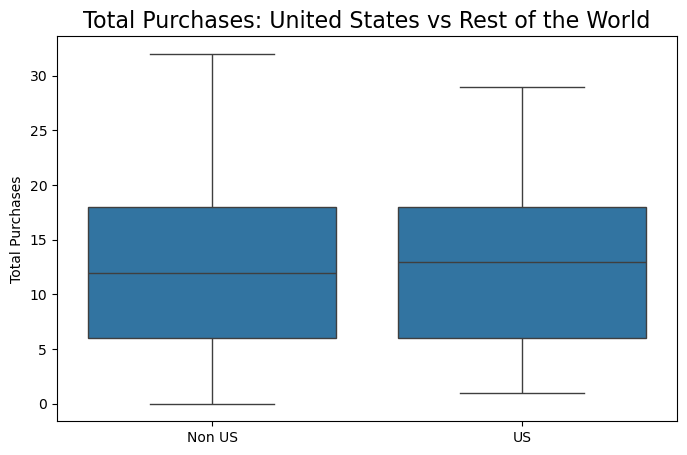

In [100]:
marketing_data['TotalPurchases'] = (marketing_data['NumWebPurchases'] + marketing_data['NumCatalogPurchases'] +
                                    marketing_data['NumStorePurchases'])
us_customers = marketing_data[marketing_data['Country'] == 'US']['TotalPurchases']
non_us_customers = marketing_data[marketing_data['Country'] != 'US']['TotalPurchases']
marketing_data['CustomerRegion'] = marketing_data['Country'].apply(lambda x: 'US' if x == 'US' else 'Non US')


# Perform Welch t-test (equal_var=False assumes unequal variances)
t_stat, p_value = ttest_ind(us_customers, non_us_customers, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("US significantly outperforms the rest in total purchases.")
else:
    print("No significant evidence that US outperforms others.")
print("US mean:", us_customers.mean())
print("Other countries mean:", non_us_customers.mean())

plt.figure(figsize=(8, 5))
sns.boxplot(x='CustomerRegion', y='TotalPurchases', data=marketing_data)
plt.title('Total Purchases: United States vs Rest of the World', fontsize=16)
plt.xlabel('')
plt.ylabel('Total Purchases')
plt.show()

## Data interpretation
Use appropriate visualization to help analyze the following:
1. Identify the top-performing products and those with the lowest revenue.
2. Examine if there is a correlation between customers' age and the acceptance
rate of the last campaign.
3. Determine the country with the highest number of customers who accepted
the last campaign.
4. Investigate if there is a discernible pattern in the number of children at home
and the total expenditure.
5. Analyze the educational background of customers who lodged complaints in
the last two years.

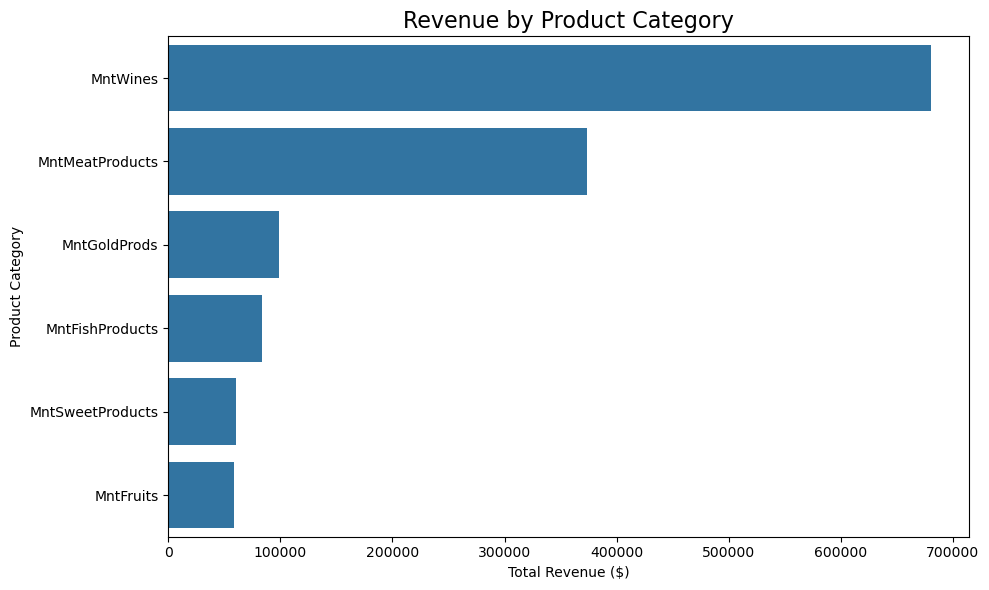

Top performing products belong to Wines category
Products with lowest revenue belong to Fruits category


In [105]:
# Identify the top-performing products and those with the lowest revenue.
product_columns = [col for col in marketing_data.columns if col.startswith('Mnt')]
# Sum across all customers
product_revenue = marketing_data[product_columns].sum().sort_values(ascending=False)

product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Product', 'TotalRevenue']

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='Product', data=product_revenue_df)
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

print(f"Top performing products belong to {product_revenue_df['Product'][0].strip('Mnt')} category")
print(f"Products with lowest revenue belong to {product_revenue_df.iloc[-1]['Product'].strip('Mnt')} category")


Correlation between age and last campaign response: -0.0213


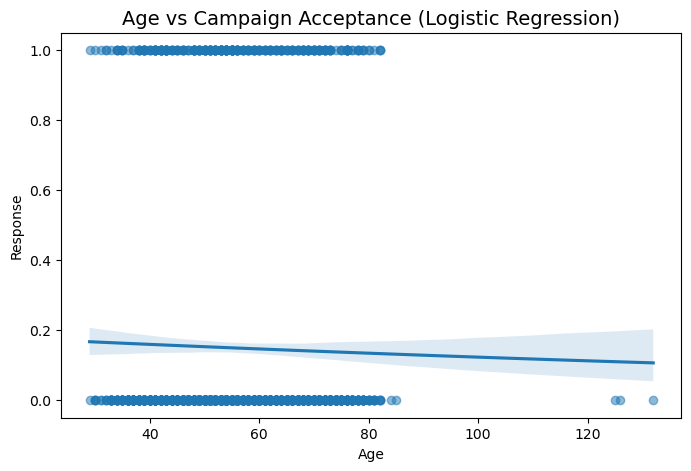

In [109]:
# Correlation between customers' age and the acceptance rate of the last campaign.
correlation = marketing_data['Age'].corr(marketing_data['Response'])
print(f"Correlation between age and last campaign response: {correlation:.4f}")

# Regression plot to visualise correlation
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Response', data=marketing_data, logistic=True, ci=95, scatter_kws={'alpha':0.5})
plt.title("Age vs Campaign Acceptance (Logistic Regression)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Response")
plt.show()

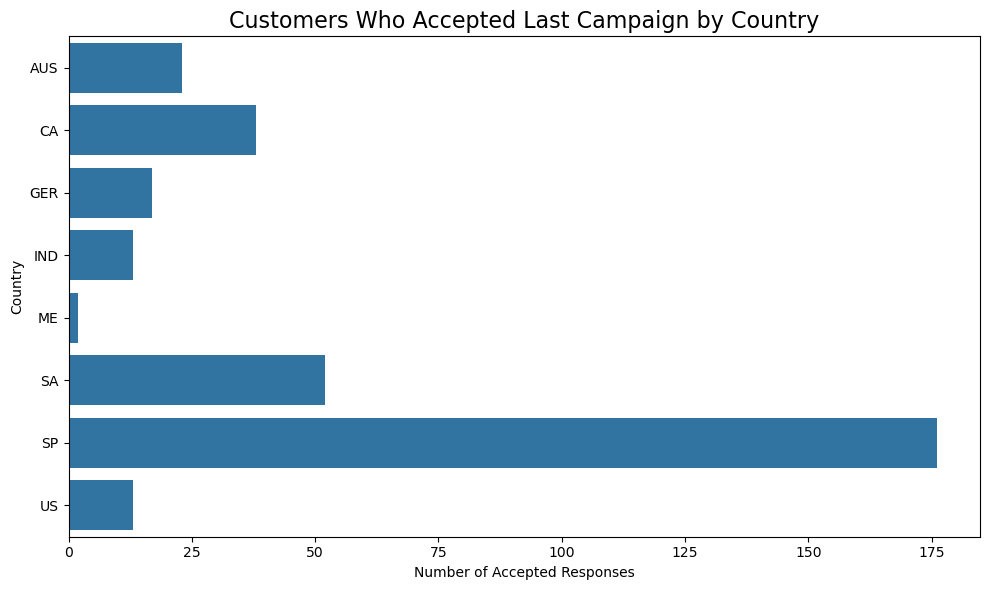


The country with the highest number of accepted responses is SP with 176 customers.


In [111]:
# Determine the country with the highest number of customers who accepted the last campaign.
accepted_customers = marketing_data[marketing_data['Response'] == 1]

# Group by 'Country' and count the number of accepted responses
acceptance_counts = accepted_customers.groupby('Country').size()

# Sort the counts to see the top country
sorted_acceptance = acceptance_counts.sort_values(ascending=False)

# Identify the top-performing country
top_country = sorted_acceptance.idxmax()
top_count = sorted_acceptance.max()

plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_counts.values, y=acceptance_counts.index)
plt.title('Customers Who Accepted Last Campaign by Country', fontsize=16)
plt.xlabel('Number of Accepted Responses')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print(f"\nThe country with the highest number of accepted responses is {top_country} with {top_count} customers.")

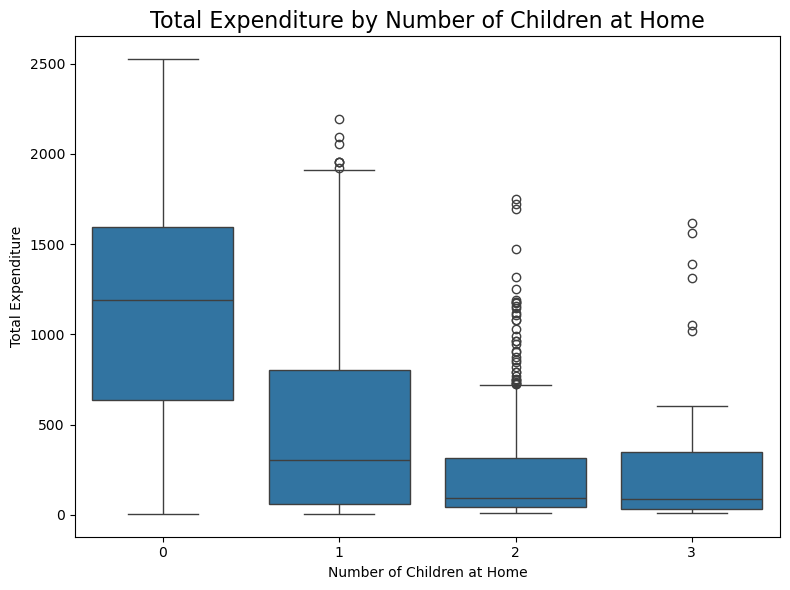

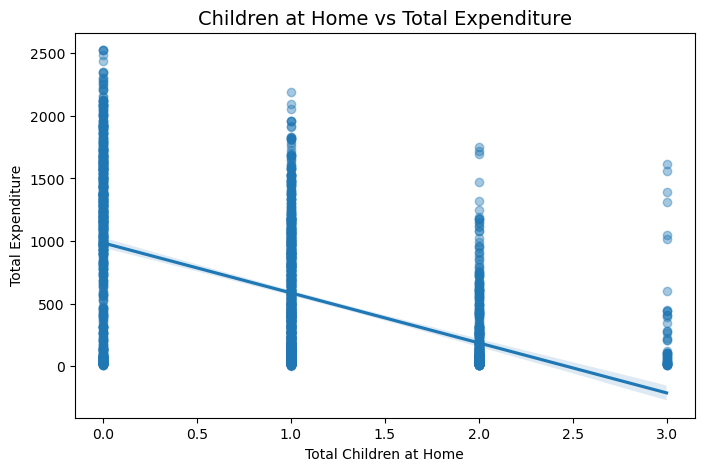

Customers are spending less if they have more number of children


In [113]:
# Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_kids', y='Total_Spending', data=marketing_data)
plt.title('Total Expenditure by Number of Children at Home', fontsize=16)
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.tight_layout()
plt.show()

# Regression plot
plt.figure(figsize=(8, 5))
sns.regplot(x='Total_kids', y='Total_Spending', data=marketing_data, ci=95, scatter_kws={'alpha': 0.4})
plt.title("Children at Home vs Total Expenditure", fontsize=14)
plt.xlabel("Total Children at Home")
plt.ylabel("Total Expenditure")
plt.show()

correlation = marketing_data['Total_kids'].corr(marketing_data['Total_Spending'])
if correlation<0:
    print('Customers are spending less if they have more number of children') 
else:
    print('No conclusive evidence between spending and number of kids') 

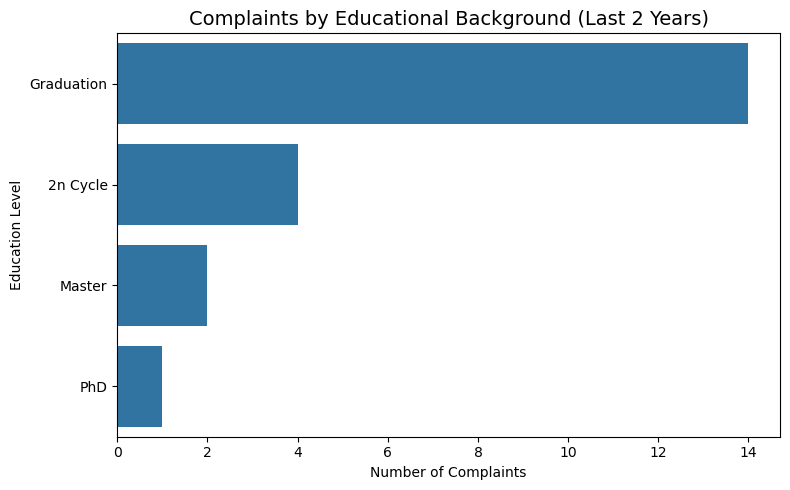

Most number of complains are from customers who have Graduation as educational background


In [115]:
# Analyze the educational background of customers who lodged complaints in the last two years.
from datetime import datetime, timedelta

recent_customers = marketing_data_untreated[marketing_data_untreated['Dt_Customer'] >= (marketing_data_untreated['Dt_Customer'].max() - timedelta(days=2*365))]
recent_complainers = recent_customers[recent_customers['Complain'] == 1]

edu_complaint_counts = recent_complainers['Education'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=edu_complaint_counts.values, y=edu_complaint_counts.index)
plt.title('Complaints by Educational Background (Last 2 Years)', fontsize=14)
plt.xlabel('Number of Complaints')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

print(f'Most number of complains are from customers who have {edu_complaint_counts.index[0]} as educational background')